# Experiment 5b Trials

In [1]:
import numpy as np
import random
import datetime
import pandas as pd
import json
from itertools import product
from markdown import markdown
import textwrap
import copy
from functools import lru_cache

from msdm.domains import GridWorld
from msdm.algorithms import PolicyIteration
from vgc_project import gridutils, sampsat

# Experiment Parameters

In [2]:
EXPERIMENT_CODE_VERSION = "5b"
EXPERIMENT_DESCRIPTION = """
Grids 12-15 catch red dot yoked to exp 3 initial rts.
"""
EXPECTED_TIME = "10 minutes"

### Instructions and training

In [3]:
def create_gridworld_params(tile_array):
    gw = GridWorld(tile_array, absorbing_features=('G', ), initial_features=('S'))

    params = {
        "feature_array": tile_array,
        "init_state": [gw.initial_states[0]['x'], gw.initial_states[0]['y']],
        "absorbing_states":[[s['x'], s['y']] for s in gw.absorbing_states],
    }
    return params

In [4]:
def generate_instructions(default_trialparams, default_taskparams, probetype):
    pretask = []
    pretask.extend([
        {"type": "reCAPTCHA"},
        {
            "type": "fullscreen",
            "fullscreen_mode": True
        },
        {
            "type": "CustomInstructions",
            "instructions": markdown(textwrap.dedent("""
                # Instructions
                Thank you for participating in our experiment!

                You will play a game where you are shown patterns on a grid and
                answer questions about how you perceive them.
                
                Next you will be shown an example grid.
            """)),
            "timing_post_trial": 1000,
            "continue_wait_time": 3000,
        },
        {
            "trialparams": {
                **default_trialparams,
                "TRIAL_DURATION_MS": 3000,
                "catchBonusDollars": .0,
                "grid": "practice-1",
                "roundtype": "practice",
            },
            "taskparams": {
                **default_taskparams,
                **create_gridworld_params([
                    'G............',
                    '.............',
                    '.............',
                    '......#......',
                    '......#......',
                    '......#...0..',
                    '.11#######000',
                    '.1....#......',
                    '.1....#......',
                    '......#......',
                    '.............',
                    '.............',
                    '............S'
                ])
            },
            "type": "GridWatchDot"
        },
        {
            "type": "CustomInstructions",
            "instructions": markdown(textwrap.dedent("""
                # Instructions
                Simple right?
            """)),
            "timing_post_trial": 1000,
            "continue_wait_time": 0,
        },
        {
            "type": 'CustomSurvey',
            "preamble": markdown(textwrap.dedent(f"""
                # Catch the red dot
                On some trials, a small <b><span style='color:red'>red</span></b> dot will briefly anywhere in
                the grid, chosen randomly. 
                
                If you press the **spacebar** when the red dot is visible, you will receive a bonus of 
                **${default_trialparams["catchBonusDollars"]:.2f}**. Similarly, if you never press
                **spacebar** and the red dot never appears, you will receive a bonus of 
                **${default_trialparams["catchBonusDollars"]:.2f}**. 
                However, if you miss the red dot, or press **spacebar** when the red dot is NOT visible, 
                you will not recieve a bonus.
                
                <br>
                
                Grids can be shown for half a second or up to 30 seconds.
                
                <br>
                You <b>must</b> answer the following questions correctly within 2 tries to continue.
                <hr>
            """)),
            "maxAttempts": 2,
            "questions": [
                {
                  "prompt": "A red dot might appear on which square?", 
                  "options": ["Squares on the left", "Any square, chosen randomly", "Squares on the right"], 
                  "required": True, 
                  "requireCorrect": True,
                  "correct": "Any square, chosen randomly",
                  "name": "reddotwhichbluesquare",
                  "type": "multiple-choice"
                },
                {
                  "prompt": "What should you do right when you see a red dot?", 
                  "options": ["Press **spacebar**", "Do nothing", "Wait for it to change."], 
                  "required": True, 
                  "requireCorrect": True,
                  "correct": "Press **spacebar**",
                  "name": "seeRedDot",
                  "type": "multiple-choice"
                },
                {
                  "prompt": "When do you win a bonus?", 
                  "options": ["There is no bonus", 
                              "When pressing **spacebar** only when a red dot appears",
                              "When pressing **spacebar**"], 
                  "required": True, 
                  "requireCorrect": True,
                  "correct": "When pressing **spacebar** only when a red dot appears",
                  "name": "bonusCheck",
                  "type": "multiple-choice"
                },
                {
                  "prompt": "How long can grids be shown?", 
                  "options": ["Only 3 seconds", 
                              "Anywhere from half a second to 30 seconds",
                              "From 5 to 10 seconds"], 
                  "required": True, 
                  "requireCorrect": True,
                  "correct": "Anywhere from half a second to 30 seconds",
                  "name": "gridDurationCheck",
                  "type": "multiple-choice"
                }
            ]
        },
        {
            "type": "CustomInstructions",
            "instructions": markdown(textwrap.dedent("""
                # Instructions
                Next, you will do some practice rounds.
            """)),
            "timing_post_trial": 100,
            "continue_wait_time": 2000,
        },
        {
            "trialparams": {
                **default_trialparams,
                "dotAppearances": [{
                    'x': 1,
                    'y': 1,
                    'time_ms': 3000,
                    'duration_ms': 7000
                }],
                "TRIAL_DURATION_MS": 10000,
                "catchBonusDollars": .0,
                "grid": "practice-2",
                "roundtype": "practice",
            },
            "taskparams": {
                **default_taskparams,
                **create_gridworld_params([
                    'G............',
                    '.............',
                    '.............',
                    '......#......',
                    '......#......',
                    '......#...0..',
                    '.11#######000',
                    '.1....#......',
                    '.1....#......',
                    '......#......',
                    '.............',
                    '.............',
                    '............S'
                ])
            },
            "type": "GridWatchDot"
        },
        {
            "trialparams": {
                **default_trialparams,
                "dotAppearances": [{
                    'x': 9,
                    'y': 5,
                    'time_ms': 5000,
                    'duration_ms': 5000
                }],
                "TRIAL_DURATION_MS": 10000,
                "catchBonusDollars": .0,
                "grid": "practice-3",
                "roundtype": "practice",
            },
            "taskparams": {
                **default_taskparams,
                **create_gridworld_params([
                    'G............',
                    '.............',
                    '.............',
                    '......#......',
                    '......#......',
                    '......#...0..',
                    '.11#######000',
                    '.1....#......',
                    '.1....#......',
                    '......#......',
                    '.............',
                    '.............',
                    '............S'
                ])
            },
            "type": "GridWatchDot"
        },
        {
            "type": "CustomInstructions",
            "instructions": markdown(textwrap.dedent("""
                # Instructions
                Those were easy trials where the red dot lasted a long time. The next trial
                will be faster.
            """)),
            "timing_post_trial": 100,
            "continue_wait_time": 2000,
        },
        {
            "trialparams": {
                **default_trialparams,
                "dotAppearances": [{
                    'x': 4,
                    'y': 4,
                    'time_ms': 500,
                    'duration_ms': 1500
                }],
                "TRIAL_DURATION_MS": 2000,
                "catchBonusDollars": .0,
                "grid": "practice-4",
                "roundtype": "practice",
            },
            "taskparams": {
                **default_taskparams,
                **create_gridworld_params([
                    '............G',
                    '.............',
                    '.............',
                    '......#......',
                    '......#......',
                    '......#......',
                    '.11#######...',
                    '.1....#......',
                    '.1....#......',
                    '......#......',
                    '......0......',
                    '.....00......',
                    'S.....0......'
                ])
            },
            "type": "GridWatchDot"
        },
        {
            "trialparams": {
                **default_trialparams,
                "dotAppearances": [{
                    'x': 8,
                    'y': 1,
                    'time_ms': 900,
                    'duration_ms': 1000
                }],
                "TRIAL_DURATION_MS": 2000,
                "catchBonusDollars": .0,
                "grid": "practice-4",
                "roundtype": "practice",
            },
            "taskparams": {
                **default_taskparams,
                **create_gridworld_params([
                    '............G',
                    '.............',
                    '.............',
                    '......#......',
                    '......#......',
                    '......#......',
                    '.11#######...',
                    '.1....#......',
                    '.1....#......',
                    '......#......',
                    '......0......',
                    '.....00......',
                    'S.....0......'
                ])
            },
            "type": "GridWatchDot"
        }
    ])
    
    if probetype == "attention":
        pretask.append(
            dict(
                type="CustomSurvey",
                preamble=markdown(textwrap.dedent(f"""
                    # ☝️ One last thing
                    In addition, we are interested in your thought process as you look for the red dot 🤔. 
                    Following <b>some</b> trials, we will ask you <u>how aware of certain blue tiles you were at any point</u>.
                    Your answer should reflect the amount you paid attention to them.
                    **These responses will not affect your bonus**.
                    Remember: your primary goal is to catch the red dot.

                    <br>
                    <hr>
                    To continue, you must answer the following comprehension questions correctly within 2 tries.
                    """)),
                maxAttempts=2,
                questions=[
                    {
                      "prompt": "Your answers to the questions will affect your bonus.", 
                      "options": ["Always", "Sometimes", "Never"], 
                      "required": True, 
                      "requireCorrect": True,
                      "correct": "Never",
                      "name": "probeNoBonusCheck",
                      "type": "multiple-choice"
                    },
                    {
                      "prompt": "What is your primary goal?", 
                      "options": ["Catch the red dot", "Answer the questions correctly", "Neither"], 
                      "required": True, 
                      "requireCorrect": True,
                      "correct": "Catch the red dot",
                      "name": "primaryGoalCheck",
                      "type": "multiple-choice"
                    }
                ]
            )
        )
    elif probetype == "memory":
        pretask.append(
            dict(
                type="CustomSurvey",
                preamble=markdown(textwrap.dedent(f"""
                    # ☝️ One last thing
                    In addition, we are interested in your thought process as you look for the red dot 🤔. 
                    Following <b>some</b> trials, we will ask you about <u>where certain blue tiles were originally</u>.
                    You will be shown two possible locations, and asked where the blue tiles were in the pattern you were just shown. 
                    **These responses will not affect your bonus**.
                    Remember: your primary goal is to catch the red dot.

                    <br>
                    <hr>
                    To continue, you must answer the following comprehension questions correctly within 2 tries.
                    """)),
                maxAttempts=2,
                questions=[
                    {
                      "prompt": "Your answers to the questions will affect your bonus.", 
                      "options": ["Always", "Sometimes", "Never"], 
                      "required": True, 
                      "requireCorrect": True,
                      "correct": "Never",
                      "name": "probeNoBonusCheck",
                      "type": "multiple-choice"
                    },
                    {
                      "prompt": "What is your primary goal?", 
                      "options": ["Catch the red dot", "Answer the questions correctly", "Neither"], 
                      "required": True, 
                      "requireCorrect": True,
                      "correct": "Catch the red dot",
                      "name": "primaryGoalCheck",
                      "type": "multiple-choice"
                    }
                ]
            )
        )
    else:
        raise Exception("unknown probetype")
    return pretask

In [5]:
def generate_posttask():
    return [
        {
            "type": 'CustomSurvey',
            "questions": [
              {
                "prompt": "In some experiments, the blue dot moves to reach a location, or can be controlled. Have you participated in an experiment like that?", 
                "required": True,
                "options": ["Yes", "No"], 
                "name": "playedGrid",
                "type": "multiple-choice"
              },
              {
                  "prompt": "Any general comments?",
                  "rows": 5,
                  "columns":50,
                  "required": False,
                  "name": "generalComments",
                  "type": "textbox"
              },
            ],
        },
        {
            "type": 'CustomSurvey',
            "questions": [
              {"prompt": "Age", "required": True, "name": "age", "type": "textbox"}, 
              {"prompt": "Gender", "required": True, "name": "gender", "type": "textbox"}, 
            ],
        },
        {
            "type": "SaveGlobalStore"
        },
        {
            "type": "fullscreen",
            "fullscreen_mode": False
        },
    ]

### Get responses from experiment 3 to be yoked

In [6]:
exp3_mod_grids = json.load(open("../mazes/mazes_12-15_mod.json", 'r'))
EXP3_NAV_FILE = "../exp3/data/navtrials.json"
EXP3_ALL_NAV_FILE = "../exp3/data/all-navtrials.json"
exp3_filt_nt = pd.read_json(open(EXP3_NAV_FILE, 'r'))
exp3_all_nt = pd.read_json(open(EXP3_ALL_NAV_FILE, 'r'))

In [7]:
nonexcluded = exp3_filt_nt.sessionId.unique()
exp3_nt = exp3_all_nt[exp3_all_nt['sessionId'].isin(nonexcluded)]
assert all(exp3_nt.groupby(["sessionId", 'round'])['reward'].sum().groupby("sessionId").count() == 8)

In [8]:
EXP3_ALL_ATTN_FILE = "../exp3/data/all-attentiontrials.json"
EXP3_ALL_MEM_FILE = "../exp3/data/all-memorytrials.json"
exp3_at = pd.read_json(open(EXP3_ALL_ATTN_FILE, 'r'))
exp3_mt = pd.read_json(open(EXP3_ALL_MEM_FILE, 'r'))

In [9]:
exp3_participantround_probes = pd.concat([
    exp3_at.groupby(['sessionId', 'round']).apply(
        lambda rs: rs.sort_values('queryround').to_dict('records')
    ),
    exp3_mt.groupby(['sessionId', 'round']).apply(
        lambda rs: rs.sort_values('queryround').to_dict('records')
    )
])
memory_participants = exp3_mt.sessionId.unique()
attn_participants = exp3_at.sessionId.unique()

In [10]:
exp3_resp = [] #each participant's grids and probes, in order
for pid, prows in exp3_nt.groupby("sessionId"):
    resp = {'sessionId': pid, 'rounds': []}
    for r, rrows in prows.sort_values("round").groupby("round"):
        first_step = rrows.sort_values("trialnum").iloc[0]
        assert first_step['trialnum'] == 0
        original_probedata = exp3_participantround_probes[(pid, r)]
        probeparams = []
        for pdata in original_probedata:
            assert pdata['sessionId'] == pid
            assert pdata['navgridname'] == first_step['gridname']
            assert pdata['round'] == r
            if pid in memory_participants:
                new_pdata = {
                    k: pdata[k] for k in ['probegridname_mem', 'navgridname', 'probeobs', 'queryround', 'true_color']
                }
                new_pdata['probetype'] = "memory"
            elif pid in attn_participants:
                new_pdata = {
                    k: pdata[k] for k in 
                    ['probeobs', 'queryround', 'navgridname']
                }
                new_pdata['probetype'] = "attention"
            else:
                raise ValueError("unrecognized participant")
            probeparams.append(new_pdata)
        round_params = {
            "navparams": {
                "sessionId": pid,
                "round": r,
                "gridname": first_step['gridname'],
                "initrt": first_step['rt'].item(),
            },
            "probeparams": probeparams
        }
        resp['rounds'].append(round_params)
    exp3_resp.append(resp)

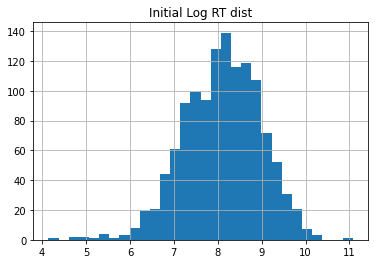

In [11]:
rts = sum([[r['navparams']['initrt'] for r in resp['rounds']] for resp in exp3_resp], [])
_ = pd.Series(np.log(rts)).hist(bins=30).set_title("Initial Log RT dist")

<AxesSubplot:>

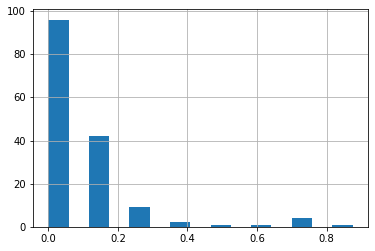

In [12]:
def rt_summary(rts):
    return {
        'mean': np.mean(rts),
        'std': np.std(rts),
        'median': np.median(rts),
        'max': np.max(rts),
        'min': np.min(rts),
        'less_than_sec': np.mean([rt < 1000 for rt in rts])
    }
rt_stats = pd.DataFrame([{
        **rt_summary([r['navparams']['initrt'] for r in resp['rounds']]),
        'sessionId': resp['sessionId']
    }
    for resp in exp3_resp])
rt_stats['less_than_sec'].hist(bins=15)

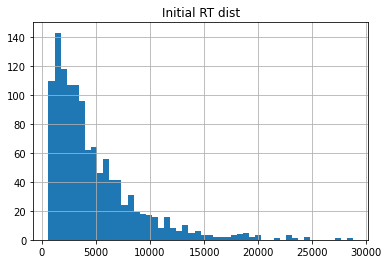

In [13]:
INITIAL_RT_MAX = 30000
INITIAL_RT_MIN = 600
_ = pd.Series([rt for rt in rts if INITIAL_RT_MIN < rt < INITIAL_RT_MAX]).hist(bins=50).set_title("Initial RT dist")

In [14]:
#prop of trials falling inside cutoff range
np.mean([INITIAL_RT_MIN < rt < INITIAL_RT_MAX for rt in rts])

0.9719551282051282

In [15]:
ALL_GRIDNAMES = ["grid-12", "grid-13", "grid-14", "grid-15"]
#transforms not used in original exp
UNUSED_TRANSFORMS = \
    set(['base', 'rot90', 'rot180', 'rot270', 'vflip', 'hflip', 'trans', 'rtrans']) -\
    set(exp3_filt_nt.trans.unique())
MIN_DOT_ONSET_MS = 100
MIN_DOT_OFFSET_MS = 0
DOT_DURATION = 1500
MIN_DOT_ONSET_TIMEFRAME_PROP = .5

#...
def process_original_navigation(navparams):
    navparams = copy.deepcopy(navparams)
#     navparams['grid'] = f"gridB-{navparams['gridname'].split('-')[1]}-0"
    navparams['grid'] = f"grid-{navparams['gridname'].split('-')[1]}"
    navparams['transform'] = navparams['gridname'].split('-')[3]
    navparams["original_gridname"] = navparams["gridname"]
    del navparams['gridname']
    navparams["original_sessionId"] = navparams["sessionId"]
    del navparams['sessionId']
    navparams["TRIAL_DURATION_MS"] = max(min(navparams['initrt'], INITIAL_RT_MAX), INITIAL_RT_MIN)
    del navparams['initrt']
    navparams['is_yoked'] = True
    return navparams
@lru_cache(maxsize=None)
def make_gridworld(arr):
    gw = GridWorld(arr, absorbing_features=('G',), initial_features=('S'))
    return gw

In [16]:
def create_GridWatchDot_config(*, trialparams, default_taskparams, basegrids, hasDot, rng):
    trans_grid = gridutils.transformations[trialparams['transform']](basegrids[trialparams['grid']])
    gw = make_gridworld(tuple(trans_grid))
    dotAppearances = []
    if hasDot:
        # choose a random location on the grid to put the dot
        grid_locs = [s for s in gw.state_list if not gw.is_terminal(s)]
        assert len(grid_locs) == len("".join(trans_grid))
        dot_s = grid_locs[rng.sample(range(len(grid_locs)), k=1)[0]]
        starttime_ms = max(trialparams['TRIAL_DURATION_MS'] - DOT_DURATION, MIN_DOT_ONSET_MS)
        dot_duration = DOT_DURATION if (trialparams['TRIAL_DURATION_MS'] > DOT_DURATION) else (trialparams['TRIAL_DURATION_MS'] - MIN_DOT_ONSET_MS)
        assert MIN_DOT_ONSET_MS <= starttime_ms
        dotAppearances = [{
            **dot_s,
            "time_ms": starttime_ms,
            "duration_ms": dot_duration
        }]
    params = {
        'trialparams': {
            **trialparams,
            "dotAppearances": dotAppearances,
            "roundtype": "main"
        },
        "taskparams": {
            **copy.deepcopy(default_taskparams),
            "feature_array": trans_grid,
            "init_state": [gw.initial_states[0]['x'], gw.initial_states[0]['y']],
            "absorbing_states":[[s['x'], s['y']] for s in gw.absorbing_states],
        },
        "type": "GridWatchDot"
    }
    return params

In [17]:
def create_attention_probe_configs(*, probeparams, nav_trialconfig, rng):
    configs = []
    for pp in probeparams:
        obs = str(pp['probeobs'])
        taskparams = copy.deepcopy(nav_trialconfig['taskparams'])
        trialparams = copy.deepcopy(nav_trialconfig['trialparams'])
        taskparams["feature_colors"][obs] = '#48D1CC' #MediumTurquoise
        assert pp['navgridname'] == trialparams['original_gridname']
        assert pp['probetype'] == 'attention'
        configs.append({
            "type": "GridBlockAttentionQuery",
            "round": trialparams['round'],
            "roundtype": "attentionquery",
            "queryround": pp['queryround'], #the n-th asked about this round
            "probegridparams": taskparams,
            "navtrialparams": trialparams,
            "probeobs": obs,
            "questiontext": "How aware of the highlighted tiles were you at any point?"
        })
    return configs

In [18]:
def create_memory_probe_configs(*, probeparams, nav_trialconfig, mod_grids, rng):
    GREEN = '#44A9A0'
    YELLOW = "#DCCB5D"
    configs = []
    for pp in probeparams:
        obs = str(pp['probeobs'])
        mod_obs = dict(zip("0123456", "ABCDEFG"))[obs]
        taskparams = copy.deepcopy(nav_trialconfig['taskparams'])
        trialparams = copy.deepcopy(nav_trialconfig['trialparams'])
        taskparams["feature_colors"][obs] = '#48D1CC' #MediumTurquoise
        assert pp['navgridname'] == trialparams['original_gridname']
        assert pp['probetype'] == 'memory'
        
        #color of correct answer
        if pp['true_color'] == "Green":
            true_color = GREEN
            mod_color = YELLOW
        elif pp['true_color'] == "Yellow":
            true_color = YELLOW
            mod_color = GREEN
        else:
            raise Exception("unknown color")
        
        # probegridparams
        grid = trialparams['grid']
        transform = trialparams['transform']
        tgrid = gridutils.transformations[transform](mod_grids[grid])
        probegridparams = {
            **copy.deepcopy(taskparams),
            'feature_colors': {
                "#": "black",
                obs: true_color,
                mod_obs: mod_color
            },
            'feature_array': tgrid,
        }
        configs.append({
            'dontSave': ['initResponse', 'navtrialparams', 'questiontext', 'stimuli', 'validResponses', 'responseEndLabels'],
            'initResponse': "?",
            'mod_color': mod_color,
            'navtrialparams': trialparams,
            'grid': grid,
            'transform': transform,
            'probeobs': obs,
            'queryround': pp['queryround'],
            'questiontext': "Blue tiles were <b>either</b> in the yellow <b>or</b> green location (not both), which one was it?",
            "responseEndLabels": ["", ""],
            "responseLabels": ["Yellow", "?", "Green"],
            'round': trialparams['round'],
            'roundtype': "probe_2afc",
            'stimuli': [{
                "TILE_SIZE": 25,
                "gridworldparams": probegridparams,
                "type": "gridworld"
            }],
            'true_color': true_color,
            "type": "CustomItem",
            "validResponses": ["Yellow", "Green"]
        })
        configs.append({
            'dontSave': ['initResponse', 'navtrialparams', 'questiontext', 'stimuli', 'validResponses', 'responseEndLabels'],
            'initResponse': "?",
            'mod_color': mod_color,
            'navtrialparams': trialparams,
            'grid': grid,
            'transform': transform,
            'probeobs': obs,
            'queryround': pp['queryround'],
            'questiontext': "How confident are you?",
            "responseEndLabels": ["I guessed", "I'm certain"],
            "responseLabels": [1, 2, 3, 4, "?", 5, 6, 7, 8],
            'round': trialparams['round'],
            'roundtype': "probe_conf",
            'stimuli': [{
                "TILE_SIZE": 25,
                "gridworldparams": probegridparams,
                "type": "gridworld"
            }],
            'true_color': true_color,
            "type": "CustomItem",
            "validResponses": [1, 2, 3, 4, 5, 6, 7, 8]
        })
    return configs

In [19]:
def sample_maintrial_configs(*, resp, basegrids, mod_grids, default_trialparams, default_taskparams, rng):
    crit_trialparams = []
    for navtrial in resp['rounds']:
        crit_params = process_original_navigation(navtrial['navparams'])
        crit_params['probeparams'] = navtrial['probeparams']
        crit_trialparams.append(crit_params)
    #generate dummy trials
    dum_combos = set(product(ALL_GRIDNAMES, UNUSED_TRANSFORMS)) - set([(t['grid'], t['transform']) for t in crit_trialparams])
    dum_combos = sorted(dum_combos, key=lambda _: rng.random())[:8]
    dum_trialdur = sorted([t['TRIAL_DURATION_MS'] for t in crit_trialparams], key=lambda _: rng.random())
    dummy_trialparams = []
    for (gn, trans), trialdur in zip(dum_combos, dum_trialdur):
        dummy_trialparams.append({
            'is_yoked': False,
            'hasDot': True,
            'grid': gn,
            'transform': trans,
            'TRIAL_DURATION_MS': trialdur
        })
    #generate trial sequence
    initial_dummy_trialparams = copy.deepcopy(dummy_trialparams)
    init_dum_dot = sorted([True, False]*(len(dummy_trialparams)//2), key=lambda _: rng.random())
    sampsat.condition(sampsat.no_repeat(init_dum_dot, repeat_size=3))
    for tp in initial_dummy_trialparams:
        tp['hasDot'] = init_dum_dot.pop(0)
    nav_trialparams = []
    while crit_trialparams + dummy_trialparams:
        if rng.randint(0, 1):
            nav_trialparams.append(crit_trialparams.pop(0))
        else:
            nav_trialparams.append(dummy_trialparams.pop(0))
        if not dummy_trialparams:
            nav_trialparams.extend(crit_trialparams)
            break
        if not crit_trialparams:
            nav_trialparams.extend(dummy_trialparams)
            break
    #randomly generate timeline configurations, including inter-trial 
    sampsat.condition(sampsat.no_repeat([t['is_yoked'] for t in nav_trialparams], repeat_size=3))
    nav_trialparams = sorted(initial_dummy_trialparams, key=lambda _: rng.random()) + nav_trialparams
    sampsat.condition(sampsat.no_repeat([(t['grid'], t['transform']) for t in nav_trialparams], repeat_size=2))
    sampsat.condition(sampsat.no_repeat([t['grid'] for t in nav_trialparams], repeat_size=3))
    sampsat.condition(sampsat.no_repeat([t['transform'] for t in nav_trialparams], repeat_size=3))
    intertrial_pause = {
        "type": "CustomInstructions",
        "instructions": "&nbsp;",
        "auto_continue": True,
        "continue_wait_time": 2000,
    }
    timeline = []
    probetype = None
    for ntp_i, ntp in enumerate(nav_trialparams):
        hasDot = ntp.get('hasDot', False)
        nav_trialconfig = create_GridWatchDot_config(
            trialparams={**default_trialparams, **ntp, "round": ntp_i}, 
            default_taskparams=default_taskparams,
            basegrids=basegrids,
            hasDot=hasDot,
            rng=rng
        )
        timeline.append(nav_trialconfig)
        timeline.append({**intertrial_pause})
        if nav_trialconfig['trialparams']['is_yoked']:
            if ntp['probeparams'][0]['probetype'] == "memory":
                probe_configs = create_memory_probe_configs(
                    probeparams=ntp['probeparams'],
                    nav_trialconfig=nav_trialconfig,
                    mod_grids=mod_grids,
                    rng=rng
                )
                probetype = "memory"
            elif ntp['probeparams'][0]['probetype'] == 'attention':
                probe_configs = create_attention_probe_configs(
                    probeparams=ntp['probeparams'],
                    nav_trialconfig=nav_trialconfig,
                    rng=rng
                )
                probetype = "attention"
            timeline.extend(probe_configs)
    
    #how many main trials in total
    if probetype == 'memory':
        assert len(timeline) == 2*8 + 2*8 + 2*5*8 + 2*8
    elif probetype == 'attention':
        assert len(timeline) == 2*8 + 2*8 + 5*8 + 2*8
    # every grid should be the same size
    assert len(set([len("".join(t['taskparams']['feature_array'])) for t in timeline if 'taskparams' in t])) == 1
    return timeline

In [20]:
import tqdm
default_taskparams = {
    "feature_colors": {
        "#": "black",
        "G": "yellow",
        "S": "white",
        ".": "white",
        **{i: "mediumblue" for i in "0123456"}
    },
    "wall_features": ["#", ] + list("0123456"),
    "show_rewards": False,   
}
default_trialparams = {
    "dotAppearances": [],
    "catchBonusDollars": .02,
    "TRIAL_DURATION_MS": 10000,
    "DOT_RADIUS": .1,
    "TILE_SIZE": 40,
    'EXPERIMENT_CODE_VERSION': EXPERIMENT_CODE_VERSION
}
basegrids = json.load(open("../mazes/mazes_12-15.json", 'r'))
mod_grids = json.load(open("../mazes/mazes_12-15_mod.json", 'r'))
rng_seed = 493319
rng = random.Random(rng_seed)
timelines = []
for resp in tqdm.tqdm(exp3_resp):
    instruction_config = generate_instructions(
        default_trialparams,
        default_taskparams,
        probetype="attention"
    )
    main_config = sampsat.rejection(lambda : sample_maintrial_configs(
        resp=resp,
        basegrids=basegrids,
        mod_grids=mod_grids,
        default_trialparams=default_trialparams,
        default_taskparams=default_taskparams,
        rng=rng
    ), debug=False)
    posttask_config = generate_posttask()
    timelines.append(instruction_config + main_config + posttask_config)

100%|██████████| 156/156 [00:06<00:00, 25.92it/s]


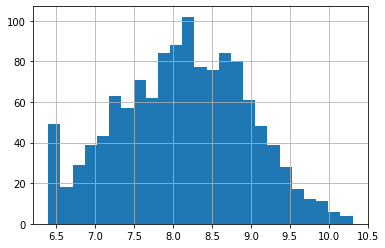

In [21]:
#properties of response times
yoked_rts = []
dot_durations = []
for tl in timelines:
    for t in tl:
        if t['type'] == "GridWatchDot" and t['trialparams'].get('is_yoked', False):
            yoked_rts.append(t['trialparams']['TRIAL_DURATION_MS'])
        if t['type'] == "GridWatchDot" and t['trialparams']['dotAppearances'] and t['trialparams']['roundtype'] == 'main':
            dot_durations.append(t['trialparams']['dotAppearances'][0]['duration_ms'])
pd.Series(np.log(yoked_rts)).hist(bins=25)
assert np.mean(yoked_rts) > 3000
assert all(pd.Series(dot_durations) <= 1500)

<AxesSubplot:>

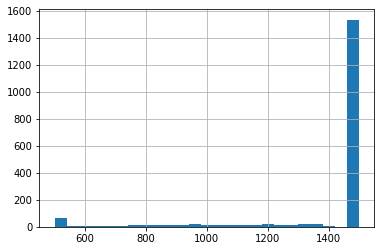

In [22]:
pd.Series(dot_durations).hist(bins=25)

In [23]:
(pd.Series(dot_durations) >= 1000).mean()

0.8963675213675214

In [24]:
(pd.Series(yoked_rts) >= 1000).mean()

0.9150641025641025

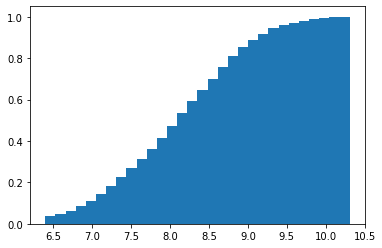

In [25]:
import matplotlib.pyplot as plt
_ = plt.hist(np.log(yoked_rts),cumulative=True, density=True, bins=30)

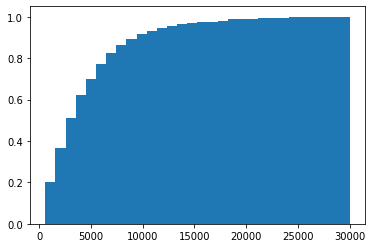

In [26]:
_ = plt.hist(yoked_rts,cumulative=True, density=True, bins=30)

In [27]:
#check general features of grids
shape = lambda g: (len(g[0]), len(g))
N_MAIN_TRIALS = 16 + 8
N_PROBE_TRIALS = 8*5, 8*5*2
GRID_SHAPE = (13, 13)
for tl in timelines:
    #test correct number of main trials
    assert len([t for t in tl if t.get('trialparams', False) and t['trialparams']['roundtype'] == 'main']) == N_MAIN_TRIALS
    #test number of probe trials
    assert len([t for t in tl if t.get('probeobs', False)]) in N_PROBE_TRIALS
    #test all grids are the same size (including practice)
    assert set([shape(t['taskparams']['feature_array']) for t in tl if t.get('taskparams', False)]) == {GRID_SHAPE}

# SAVE EXPERIMENT CONFIGURATIONS

In [28]:
import configparser
import datetime

EXP_CONFIG_DIR = "../../experiment.psiturkapp/static/config/"
EXP_CONFIG_FILE = EXP_CONFIG_DIR+"config.json.zip"
PSITURKAPP_CONFIG = "../../experiment.psiturkapp/config.txt"

#####################
params = {
    "EXPERIMENT_CODE_VERSION": EXPERIMENT_CODE_VERSION,
    "maintrials_seed": rng_seed,
    "expectedTime": EXPECTED_TIME,
    "config_creation_time": str(datetime.datetime.now()),
    "recruitment_platform": "prolific"
}
experiment_config = {
    "timelines": timelines,
    "params": params,
    "preloadImages": [
        "static/images/bluedotgrid.png", 
        "static/images/goalsquare.png",
        "static/images/green_goal.png",
        "static/images/x_start.png"
    ]
}


In [29]:
# UPDATE PSITURK APP
import zipfile
json.dump(experiment_config,
          open(f"config.json", "w"), separators=(',', ':'))
zipfile.ZipFile("config.json.zip", mode="w", compression=zipfile.ZIP_DEFLATED).write("config.json")

config = configparser.ConfigParser()
res = config.read(PSITURKAPP_CONFIG)
assert len(res) > 0
config["Task Parameters"]["experiment_code_version"] = EXPERIMENT_CODE_VERSION
config["Task Parameters"]["num_conds"] = str(len(experiment_config['timelines']))
print(f"{len(experiment_config['timelines'])} conditions")
with open(PSITURKAPP_CONFIG, 'w') as configfile:
    config.write(configfile)
    
import subprocess
process = subprocess.Popen(f"cp config.json.zip {EXP_CONFIG_FILE}".split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print(output, error)
process = subprocess.Popen(f"cp config.json.zip {EXP_CONFIG_DIR + '/config-' + EXPERIMENT_CODE_VERSION}.json.zip".split(), stdout=subprocess.PIPE)
output, error = process.communicate()
print(output, error)

156 conditions
b'' None
b'' None
